# Applied Pandas Example

## Pandas is used for working with datasets and is particularly useful for analyzing, cleaning, and manipulating datasets.

## In this notebook, we will read in a CSV file of the annual climatology summary for Dekalb, IL. From there, we will select out the heating degree day (HDD) and cooling degree day (CDD) columns of the file to plot out over the period of records. We will need to remove incomplete data from the edge years (1966 and 2025). After plotting absolute HDD and CDD for Dekalb over the period of record, we will calculate the mean HDD and CDD over the period of record. We will calcuate how each year's HDD and CDD deviate from the mean and the finally plot the deviations to compare over time.

### Plotting heating degree days (HDD) and cooling degree days (CDD) for Dekalb, IL over time

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read into Dataframe Annual Climate Summary CSV file for Dekalb, IL station for period of 1966-2025

In [15]:
dkb_climo_summary = pd.read_csv("dkb_annual_climo_summary.csv")


### Remove incomplete 1966 and 2025 data from dataset using booleans

In [16]:
dkb_climo_summary = dkb_climo_summary[(dkb_climo_summary['Year'] != 1966) & (dkb_climo_summary['Year'] != 2025)]

### Select only year, HDD, and CDD columns

In [17]:
dkb_hdd = dkb_climo_summary[['Year', 'HDD']]

In [18]:
dkb_cdd = dkb_climo_summary[['Year', 'CDD']]

### Plot the HDD data in a figure

Text(0.5, 0, 'Year')

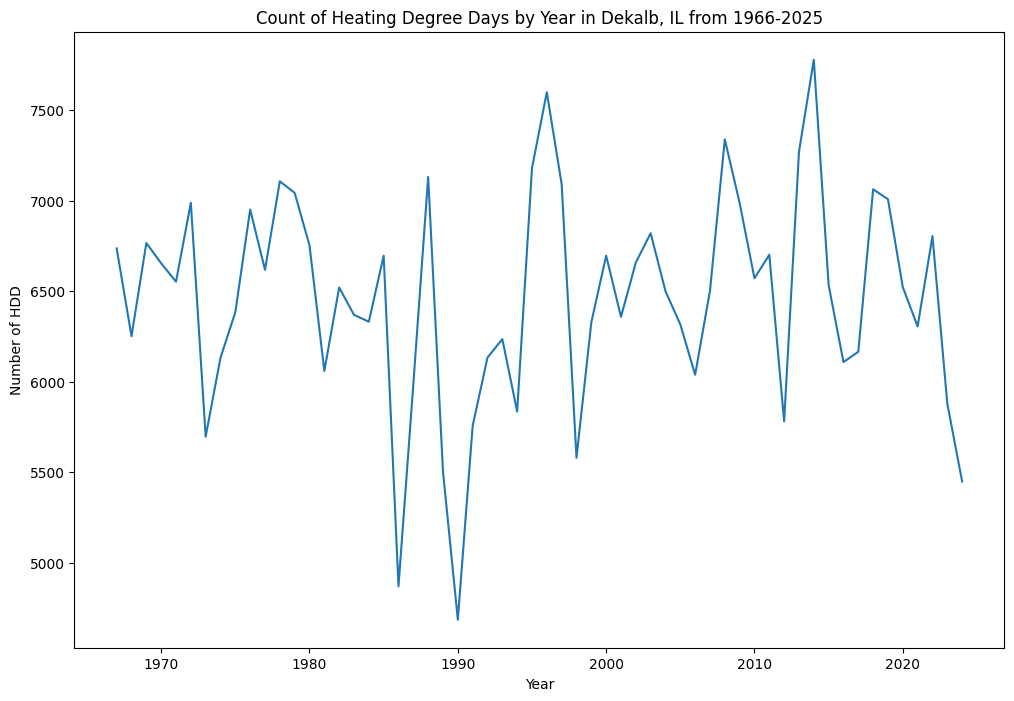

In [ ]:
# plot the figure
plt.figure(figsize=(12,8))
plt.plot(dkb_hdd['Year'], dkb_hdd['HDD']) # plot HDD by year
plt.title('Count of Heating Degree Days by Year in Dekalb, IL from 1966-2025') # add a title
plt.ylabel('Number of HDD') # add y-axis label
plt.xlabel('Year')

### Plot the CDD data in 

Text(0.5, 0, 'Year')

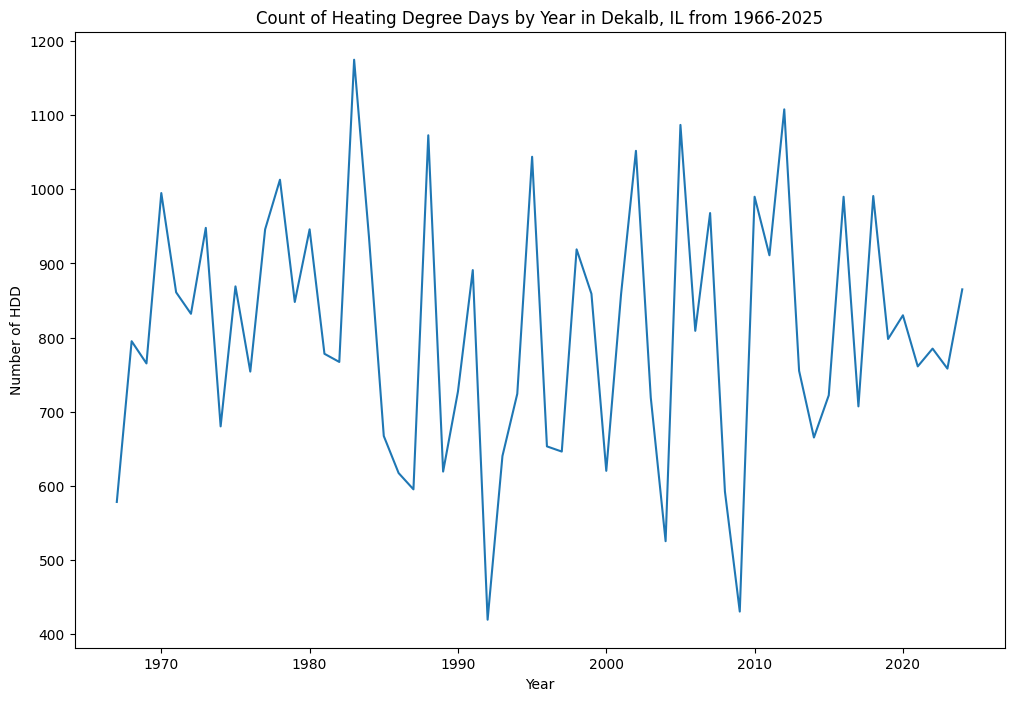

In [28]:
# plot the CDD figure
plt.figure(figsize=(12,8))
plt.plot(dkb_cdd['Year'], dkb_cdd['CDD']) # plot CDD by year
plt.title('Count of Heating Degree Days by Year in Dekalb, IL from 1966-2025') # add title
plt.ylabel('Number of HDD') # add y-axis label
plt.xlabel('Year') # add x-axis label

### Calculate yearly mean HDD and CDD for Dekalb, IL using Pandas mean function

In [21]:
mean_hdd = dkb_hdd['HDD'].mean()
mean_cdd = dkb_cdd['CDD'].mean()


### Caluculate how each year's HDD and CDD deviated from the mean

In [29]:
# Make a copy of the dataframes so as not to affect the origial 

dkb_hdd = dkb_hdd.copy()
dkb_hdd['HDD_Deviation'] = dkb_hdd['HDD'] - mean_hdd

dkb_cdd = dkb_cdd.copy()
dkb_cdd['CDD_Deviation'] = dkb_cdd['CDD'] - mean_cdd


### Plot the deviations from mean

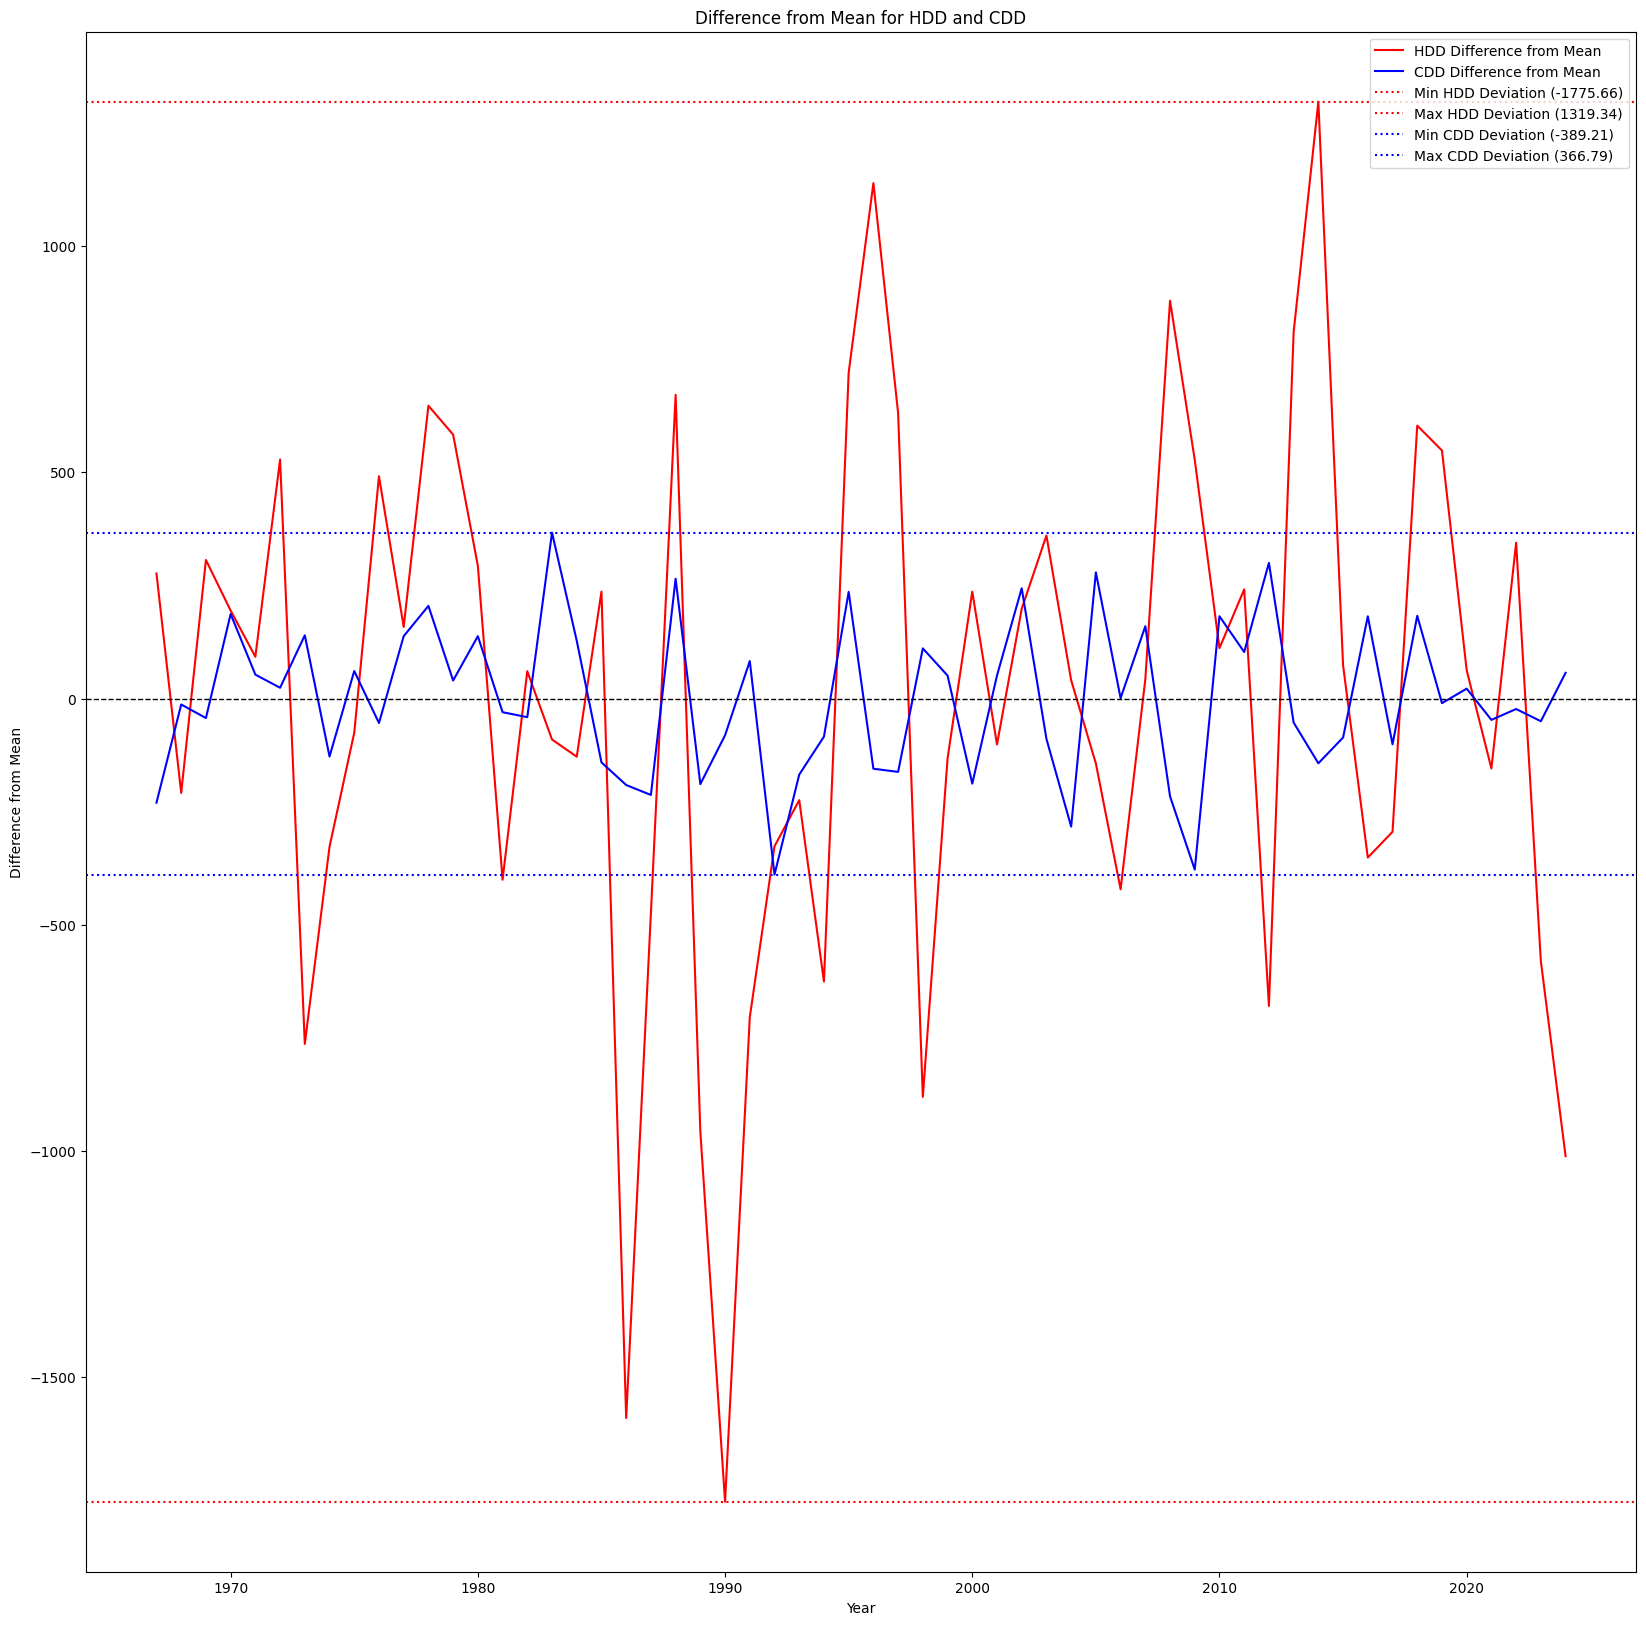

In [32]:
# plot the figure
fig, ax = plt.subplots(figsize=(20,20))

ax.plot(dkb_hdd['Year'], dkb_hdd['HDD_Deviation'], label='HDD Difference from Mean', color='red') # plot the HDD deviation in red
ax.plot(dkb_cdd['Year'], dkb_cdd['CDD_Deviation'], label='CDD Difference from Mean', color='blue') # plot CDD deviation in blue

# Calculate min and max values for HDD and CDD deviations
min_hdd = dkb_hdd['HDD_Deviation'].min()
max_hdd = dkb_hdd['HDD_Deviation'].max()
min_cdd = dkb_cdd['CDD_Deviation'].min()
max_cdd = dkb_cdd['CDD_Deviation'].max()

# add horizontal lines for zero line, min and max values
ax.axhline(0, color='black', linewidth=1, linestyle='--') # add line for zero to better discern above vs. below average HDD and CDD over time
ax.axhline(min_hdd, color='red', linestyle=':', label=f'Min HDD Deviation ({min_hdd:.2f})')  # min HDD line
ax.axhline(max_hdd, color='red', linestyle=':', label=f'Max HDD Deviation ({max_hdd:.2f})')  # max HDD line
ax.axhline(min_cdd, color='blue', linestyle=':', label=f'Min CDD Deviation ({min_cdd:.2f})')  # min CDD line
ax.axhline(max_cdd, color='blue', linestyle=':', label=f'Max CDD Deviation ({max_cdd:.2f})')  # max CDD line

ax.set_xlabel('Year') # add x-axis label
ax.set_ylabel('Difference from Mean') # add y-axis label
ax.set_title('Difference from Mean for HDD and CDD') # add title
ax.legend() # add a legend